# Life Expectancy (WHO)

Bu proje, Dünya Sağlık Örgütü (WHO) tarafından sağlanan verileri kullanarak hayat beklentisini etkileyen faktörleri incelemeyi amaçlamaktadır. Geçmişte yapılan çalışmalarda genellikle demografik değişkenler, gelir bileşimi ve ölüm oranları gibi etmenler ele alınmış, ancak aşılamanın ve insan gelişim indeksinin etkileri yeterince araştırılmamıştır. Bu çalışmada, 2000-2015 yılları arasında 193 ülke için toplanan verilerle karma etkiler modeli ve çoklu doğrusal regresyon analizi yapılacaktır. Önemli aşılama oranları, ölüm oranları, ekonomik ve sosyal faktörler dikkate alınarak, hayat beklentisini etkileyen anahtar değişkenler belirlenecek ve bu faktörlerin sağlık hizmetleri ve politika geliştirme üzerindeki potansiyel etkileri değerlendirilecektir. Sonuçlar, ülkelerin yaşam süresini iyileştirmek için hangi alanlara odaklanmaları gerektiği konusunda önemli bilgiler sunacaktır.

## 🔗 Hugging Face Uygulaması
[Hayat Beklentisi - Hugging Face Space](https://huggingface.co/spaces/btulftma/Life_Expectancy)

## 🔗 Kaggle Veri Seti
[Hayat Beklentisi Veri Seti](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

[Life Expectancy (WHO) - Github](https://github.com/FBetulS/Life-Expectancy)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [4]:
df=pd.read_csv("Life Expectancy Data.csv")

In [5]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
785,Dominican Republic,2000,Developing,72.0,176.0,7,6.58,44.792478,68.0,253,43.1,9,71.0,5.90,78.0,2.5,282.424200,8562622.0,3.8,3.7,0.651,12.2
536,Chad,2007,Developing,49.4,394.0,46,0.42,5.962924,NaN,441,16.1,80,38.0,3.35,28.0,4.9,81.683884,177578.0,1.0,1.0,0.306,5.7
1353,Kazakhstan,2008,Developing,66.6,258.0,8,7.60,708.328579,99.0,20,47.9,9,99.0,3.65,99.0,0.1,8513.564645,15674.0,2.4,2.5,0.758,14.6
2800,United States of America,2009,Developed,78.5,18.0,26,8.71,0.000000,92.0,71,66.3,31,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
1361,Kazakhstan,2000,Developing,63.9,292.0,9,6.00,112.541157,99.0,245,43.9,10,96.0,4.16,97.0,0.1,1229.958000,14883626.0,2.7,2.7,0.676,12.1


| **Sütun Adı**                     | **Açıklama**                                                                                  |
|-----------------------------------|-----------------------------------------------------------------------------------------------|
| Country                           | Ülke adı.                                                                                    |
| Year                              | Veri kaynağının toplandığı yıl.                                                              |
| Status                            | Ülkenin gelişim durumu (Gelişen, Gelişmiş vb.).                                             |
| Life expectancy                   | Ortalama yaşam beklentisi (yıl).                                                             |
| Adult Mortality                   | Yetişkin ölüm oranı (1000 kişi başına).                                                     |
| Infant deaths                     | Bebek ölümleri (yılda toplam)                                                                |
| Alcohol                           | Kişi başına alkol tüketimi (litre).                                                          |
| Percentage expenditure             | Sağlık harcamalarının GSYİH'ye oranı (%).                                                    |
| Hepatitis B                       | Hepatit B aşısı kapsamı (%).                                                                 |
| Measles                           | Kızamık aşısı kapsamı (%).                                                                    |
| BMI                               | Vücut kitle indeksi (ortalama).                                                              |
| Under-five deaths                 | 5 yaş altı ölümler (yılda toplam).                                                           |
| Polio                             | Polio aşısı kapsamı (%).                                                                     |
| Total expenditure                 | Toplam sağlık harcamaları (GSYİH'nin yüzdesi).                                              |
| Diphtheria                        | Difteri aşısı kapsamı (%).                                                                    |
| HIV/AIDS                          | HIV/AIDS ile ilgili durum (yılda toplam).                                                   |
| GDP                               | Gayri safi yurtiçi hasıla (GSYİH) (USD cinsinden).                                          |
| Population                        | Ülke nüfusu.                                                                                 |
| Thinness 1-19 years              | 1-19 yaş arası zayıf bireylerin oranı (%).                                                  |
| Thinness 5-9 years               | 5-9 yaş arası zayıf bireylerin oranı (%).                                                   |
| Income composition of resources    | Gelir bileşiminin kaynakları (0 ile 1 arasında bir değer).                                  |
| Schooling                         | Ortalama eğitim süresi (yıl).                                                                |

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

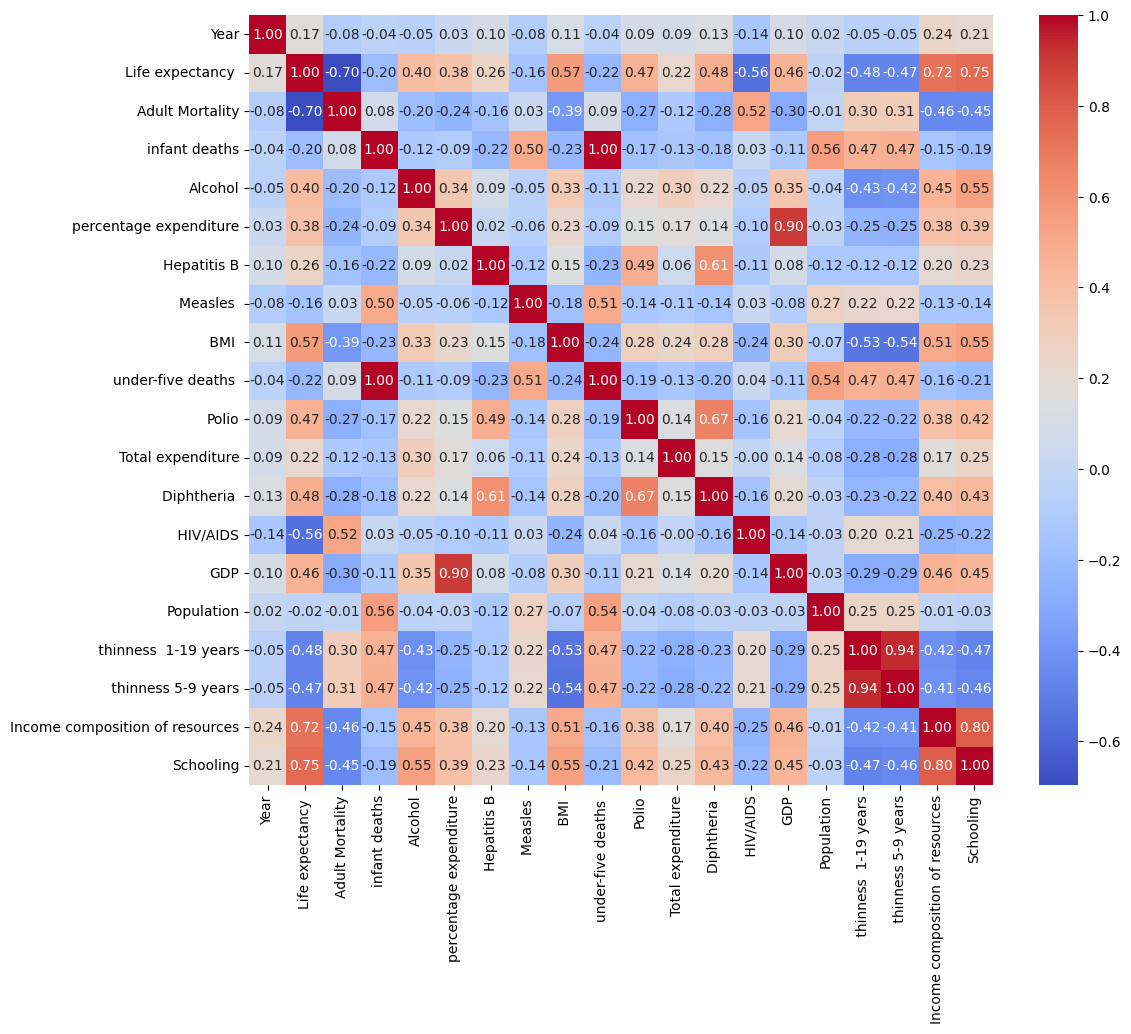

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", 
             annot_kws={"size": 10}, cmap='coolwarm')

In [9]:
df.corr(numeric_only=True)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.sample()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
864,Eritrea,2001,Developing,58.1,345.0,7,0.61,5.59362,NaN,204,12.8,10,89.0,3.95,86.0,2.0,215.139213,3497124.0,1.0,1.0,0.0,4.3


In [13]:
abs(df.corr(numeric_only=True)['Life expectancy'].sort_values(ascending=False))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                         0.021538
Measles                            0.157586
infant deaths                      0.196557
under-five deaths                  0.222529
thinness 5-9 years                 0.471584
thinness  1-19 years               0.477183
HIV/AIDS                           0.556556
Adult Mortality                    0.696359
Name: Life expectancy, dtype: float64

In [14]:
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [15]:
df = df.dropna(subset=['Life expectancy'])

In [16]:
df['Status'].value_counts()

Status
Developing    2416
Developed      512
Name: count, dtype: int64

In [17]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
df = df.drop('Population', axis=1)

In [19]:
df = df.sort_values(by=['Country', 'Year'])

In [20]:
numeric_cols = df.select_dtypes(include=np.number).columns

# İnterpolasyon uygulayalım
for col in numeric_cols:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

In [21]:
df.isnull().sum().sort_values(ascending=False)

Country                            0
under-five deaths                  0
Income composition of resources    0
thinness 5-9 years                 0
thinness  1-19 years               0
GDP                                0
HIV/AIDS                           0
Diphtheria                         0
Total expenditure                  0
Polio                              0
BMI                                0
Year                               0
Measles                            0
Hepatitis B                        0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Life expectancy                    0
Status                             0
Schooling                          0
dtype: int64

In [22]:
df = pd.get_dummies(df, columns=['Country', 'Status'])

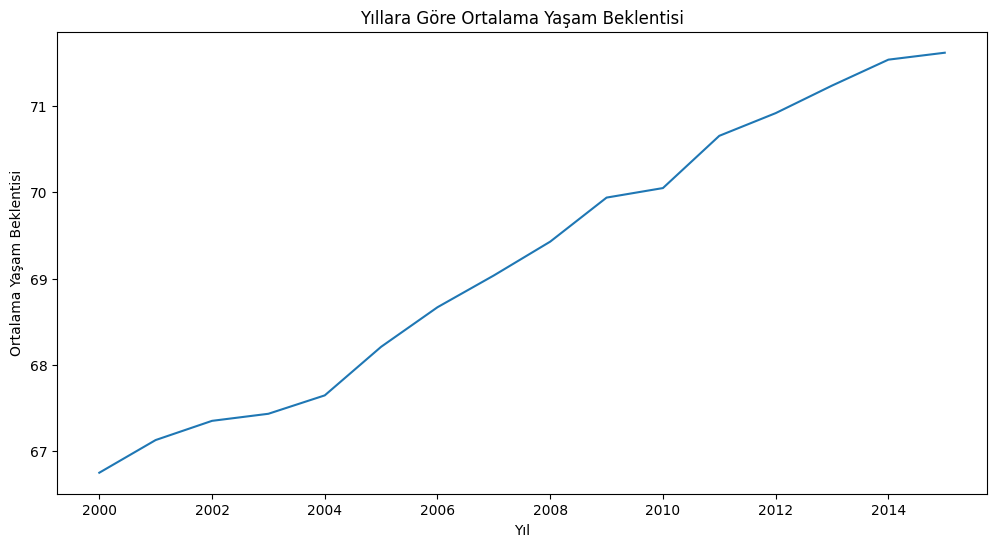

In [23]:
yearly_avg_life_expectancy = df.groupby('Year')['Life expectancy'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg_life_expectancy.index, y=yearly_avg_life_expectancy.values)
plt.title("Yıllara Göre Ortalama Yaşam Beklentisi")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Yaşam Beklentisi");

In [24]:
# 1. Sağlık Harcamalarının GDP'ye Oranı
df['Health Expenditure Ratio'] = df['Total expenditure'] / df['GDP']

In [25]:
# 2. Aşı Oranlarının Ortalaması
vaccination_cols = ['Hepatitis B', 'Polio', 'Diphtheria']
df['Average Vaccination Coverage'] = df[vaccination_cols].mean(axis=1)

In [26]:
# 3. İnsani Gelişme Endeksi (Income composition of resources) ve Eğitim Seviyesinin Etkileşimi
df['Human Development Index * Schooling'] = df['Income composition of resources'] * df['Schooling']

In [27]:
df.sample(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing,Health Expenditure Ratio,Average Vaccination Coverage,Human Development Index * Schooling
2849,2008,75.0,153.0,0,1.18,345.339056,61.0,0,47.4,0,66.0,3.66,67.0,0.1,2697.961375,1.5,1.5,0.582,10.7,False,False,False,False,False,Fal

In [28]:
def train_and_evaluate_models(df, target_column='Life expectancy'):

    # Bağımsız ve bağımlı değişkenleri ayıralım
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Veriyi eğitim ve test kümelerine bölelim
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelleri tanımlayalım
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Support Vector Regression': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(random_state=42)
    }

    results = {}

    # Her modeli eğitelim ve değerlendirelim
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Performans metriklerini hesaplayalım
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'MSE': mse, 'R2': r2}

    return results

# Modelleri eğitelim ve sonuçları yazdıralım
results = train_and_evaluate_models(df)
print(results)

{'Linear Regression': {'MSE': 3.416218295152894, 'R2': 0.9616004420547214}, 'Random Forest': {'MSE': 2.985262800341301, 'R2': 0.9664445413086636}, 'Gradient Boosting': {'MSE': 4.91870067593566, 'R2': 0.9447119840412249}, 'Support Vector Regression': {'MSE': 67.12037441530909, 'R2': 0.24554215100176868}, 'K-Nearest Neighbors': {'MSE': 38.26024232081911, 'R2': 0.5699407165861627}, 'Decision Tree': {'MSE': 6.3230204778157, 'R2': 0.9289269097435705}}


In [29]:
#Özellik Önemliliği (Random Forest)
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nÖzellik Önemliliği (Random Forest):")
print(feature_importances)


Özellik Önemliliği (Random Forest):
HIV/AIDS                                                        5.959195e-01
Income composition of resources                                 1.579711e-01
Adult Mortality                                                 1.173717e-01
thinness 5-9 years                                              2.020306e-02
under-five deaths                                               1.660488e-02
                                                                    ...     
Country_Pakistan                                                5.853204e-07
Country_United Kingdom of Great Britain and Northern Ireland    4.609217e-07
Country_Mauritius                                               4.007208e-07
Country_Malaysia                                                2.029173e-07
Country_United States of America                                4.054134e-08
Length: 206, dtype: float64


In [30]:
from sklearn.feature_selection import RFE

In [31]:
#Tekrarlı Eleme (Recursive Feature Elimination - RFE)
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
rfe_features = X.columns[selector.support_]
print("\nTekrarlı Eleme (RFE) ile Seçilen Özellikler:")
print(rfe_features)


Tekrarlı Eleme (RFE) ile Seçilen Özellikler:
Index(['Income composition of resources', 'Country_Angola', 'Country_Botswana',
       'Country_Côte d'Ivoire', 'Country_Democratic Republic of the Congo',
       'Country_Grenada', 'Country_Lesotho', 'Country_Sierra Leone',
       'Country_Somalia', 'Country_United Republic of Tanzania'],
      dtype='object')


In [32]:
def train_and_evaluate_models(df, selected_features, target_column='Life expectancy'):

    X = df[selected_features]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelleri tanımlayalım
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Support Vector Regression': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(random_state=42)
    }

    results = {}

    # Her modeli eğitelim ve değerlendirelim
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Performans metriklerini hesaplayalım
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'MSE': mse, 'R2': r2}

    return results

# Seçilen özellikleri kullanalım
selected_features = [
    'Schooling',
    'Income composition of resources',
    'Adult Mortality',
    'HIV/AIDS',
    'BMI',
    'Alcohol',
    'GDP'
]

# Modelleri eğitelim ve sonuçları yazdıralım
results = train_and_evaluate_models(df, selected_features)
print(results)


{'Linear Regression': {'MSE': 19.372529783566833, 'R2': 0.7822455956558194}, 'Random Forest': {'MSE': 3.3479478174061414, 'R2': 0.9623678274908066}, 'Gradient Boosting': {'MSE': 5.227788383054876, 'R2': 0.9412377238229779}, 'Support Vector Regression': {'MSE': 67.30869793416063, 'R2': 0.24342532495325198}, 'K-Nearest Neighbors': {'MSE': 24.32700068259385, 'R2': 0.7265555091513006}, 'Decision Tree': {'MSE': 6.945665529010238, 'R2': 0.9219281489335224}}


In [33]:
# Seçilen özellikleri kullanalım
selected_features = [
    'Schooling',
    'Income composition of resources',
    'Adult Mortality',
    'HIV/AIDS',
    'BMI',
    'Alcohol',
    'GDP'
]

# Bağımsız ve bağımlı değişkenleri ayıralım
X = df[selected_features]
y = df['Life expectancy']

# Veriyi eğitim ve test kümelerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre aralığını tanımlayalım
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search ile hiperparametre optimizasyonu yapalım
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi modeli ve hiperparametreleri yazdıralım
print("En İyi Hiperparametreler:", grid_search.best_params_)
print("En İyi Model:", grid_search.best_estimator_)

# En iyi modeli test kümesi üzerinde değerlendirelim
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R2:", r2)


En İyi Hiperparametreler: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
En İyi Model: RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)
Test MSE: 3.2838585234627926
Test R2: 0.9630882148735279


In [34]:
best_model = RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)
best_model.fit(X_train, y_train)

# Tahmin yapacağımız ülke için veri hazırlayalım
# Örneğin, Türkiye için 2015 yılı verilerini kullanalım
turkey_data = {
    'Schooling': 14.5,
    'Income composition of resources': 0.85,
    'Adult Mortality': 120,
    'HIV/AIDS': 0.1,
    'BMI': 60,
    'Alcohol': 2.0,
    'GDP': 10000
}

# Veriyi DataFrame'e dönüştürelim
turkey_df = pd.DataFrame([turkey_data])

# Tahmin yapalım
predicted_life_expectancy = best_model.predict(turkey_df)[0]
print("Türkiye için Tahmini Yaşam Beklentisi:", predicted_life_expectancy)


Türkiye için Tahmini Yaşam Beklentisi: 76.17780693400151


In [66]:
import joblib
joblib.dump(best_model, 'life_expectancy_model.pkl')
import json
with open('selected_features.json', 'w') as f:
    json.dump(selected_features, f)

In [70]:
best_model = RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)
best_model.fit(X_train, y_train) 
joblib.dump(best_model, 'life_expectancy_model_v2.pkl', protocol=4)

['life_expectancy_model_v2.pkl']

Dünya Sağlık Örgütü (WHO) tarafından sağlanan verileri kullanarak yaşam beklentisini etkileyen faktörleri incelemeyi amaçlamaktadır. Proje kapsamında, veri temizleme, ön işleme, özellik mühendisliği, görselleştirme, modelleme ve senaryo analizi gibi adımlar gerçekleştirilmiştir. Veri setindeki eksik değerler interpolasyon yöntemiyle doldurulmuş, kategorik değişkenler dummy değişkenlere dönüştürülmüş ve yeni özellikler türetilmiştir. Yaşam beklentisi ile ilişkili faktörleri görselleştirmek için korelasyon matrisi, yıllara göre ortalama yaşam beklentisi grafiği ve GDP ile yaşam beklentisi arasındaki ilişkiyi gösteren çift eksenli grafikler oluşturulmuştur.

Farklı makine öğrenimi modelleri (Linear Regression, Random Forest, Gradient Boosting, Support Vector Regression, K-Nearest Neighbors, Decision Tree) kullanılarak yaşam beklentisi tahmin edilmiş ve modellerin performansı MSE ve R2 metrikleri ile değerlendirilmiştir. En iyi performansı gösteren Random Forest modeli seçilerek hiperparametre optimizasyonu yapılmıştır. Hiperparametre optimizasyonu sonucunda elde edilen en iyi model kullanılarak özellik önemliliği belirlenmiş, Türkiye için yaşam beklentisi tahmini yapılmış ve farklı senaryoların (sağlık harcamalarının artırılması) yaşam beklentisi üzerindeki etkisi analiz edilmiştir.

Proje sonuçlarına göre, okullaşma, gelir bileşimi, yetişkin ölüm oranı, HIV/AIDS, BMI, alkol tüketimi ve GDP gibi faktörler yaşam beklentisi üzerinde önemli bir etkiye sahiptir. Bu faktörlerin iyileştirilmesi, ülkelerin yaşam süresini artırmalarına yardımcı olabilir.

Bu proje, yaşam beklentisini etkileyen faktörler hakkında önemli bilgiler sağlamaktadır ve bu bilgileri kullanarak sağlık politikaları geliştirilebilir ve kaynaklar daha etkili bir şekilde yönlendirilebilir.